In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#from sklearn import datasets

In [6]:
df = pd.read_excel('SCFP2009panel.xlsx')

In [7]:
df

,Age,Income,Expenses,Investment,Risk_Appetite
0,52,9360000,3276000,160000000.0,4
1,34,280896000,563808000,31086000.0,3
2,63,18792000,5901500,204300000.0,4
3,40,199760000,3832000,198000000.0,3
4,39,380000,115500,0.0,4
...,...,...,...,...,...
397,26,1495000,644000,0.0,3
398,28,920000,374284,704000.0,4
399,27,115600000,49470000,26400000.0,3
400,24,240000,52000,120000.0,5


### Adding a column Savings by subtracting expenses from income

In [9]:
df['Savings'] = df['Income']-df['Expenses']

In [10]:
df

,Age,Income,Expenses,Investment,Risk_Appetite,Savings
0,52,9360000,3276000,160000000.0,4,6084000
1,34,280896000,563808000,31086000.0,3,-282912000
2,63,18792000,5901500,204300000.0,4,12890500
3,40,199760000,3832000,198000000.0,3,195928000
4,39,380000,115500,0.0,4,264500
...,...,...,...,...,...,...
397,26,1495000,644000,0.0,3,851000
398,28,920000,374284,704000.0,4,545716
399,27,115600000,49470000,26400000.0,3,66130000
400,24,240000,52000,120000.0,5,188000


### Moving 'riskcategory' column to last

In [12]:
data = list(df.columns)
data.remove('Risk_Appetite')
data.append('Risk_Appetite')

In [13]:
data

['Age', 'Income', 'Expenses', 'Investment', 'Savings', 'Risk_Appetite']

In [14]:
df = df[data]

In [15]:
df

,Age,Income,Expenses,Investment,Savings,Risk_Appetite
0,52,9360000,3276000,160000000.0,6084000,4
1,34,280896000,563808000,31086000.0,-282912000,3
2,63,18792000,5901500,204300000.0,12890500,4
3,40,199760000,3832000,198000000.0,195928000,3
4,39,380000,115500,0.0,264500,4
...,...,...,...,...,...,...
397,26,1495000,644000,0.0,851000,3
398,28,920000,374284,704000.0,545716,4
399,27,115600000,49470000,26400000.0,66130000,3
400,24,240000,52000,120000.0,188000,5


In [17]:
#data = df.to_csv('final123.csv', index=0)

### As savings column has negative values so removing all the negative values

In [20]:
data = df[df['Savings']>0]

In [21]:
data

,Age,Income,Expenses,Investment,Savings,Risk_Appetite
0,52,9360000,3276000,160000000.0,6084000,4
2,63,18792000,5901500,204300000.0,12890500,4
3,40,199760000,3832000,198000000.0,195928000,3
4,39,380000,115500,0.0,264500,4
5,47,759900000,367200000,317700050.0,392700000,4
...,...,...,...,...,...,...
397,26,1495000,644000,0.0,851000,3
398,28,920000,374284,704000.0,545716,4
399,27,115600000,49470000,26400000.0,66130000,3
400,24,240000,52000,120000.0,188000,5


In [22]:
#In total, we have 1610 rows

### Converting all the riskcategory value = 6, to riskcategory value = 5

In [23]:
data.rename(columns = {'Risk_Appetite':'riskcategory'}, inplace=True)

In [24]:
data[data['riskcategory']==6]

,Age,Income,Expenses,Investment,Savings,riskcategory


## EDA

Text(0, 0.5, 'Investment')

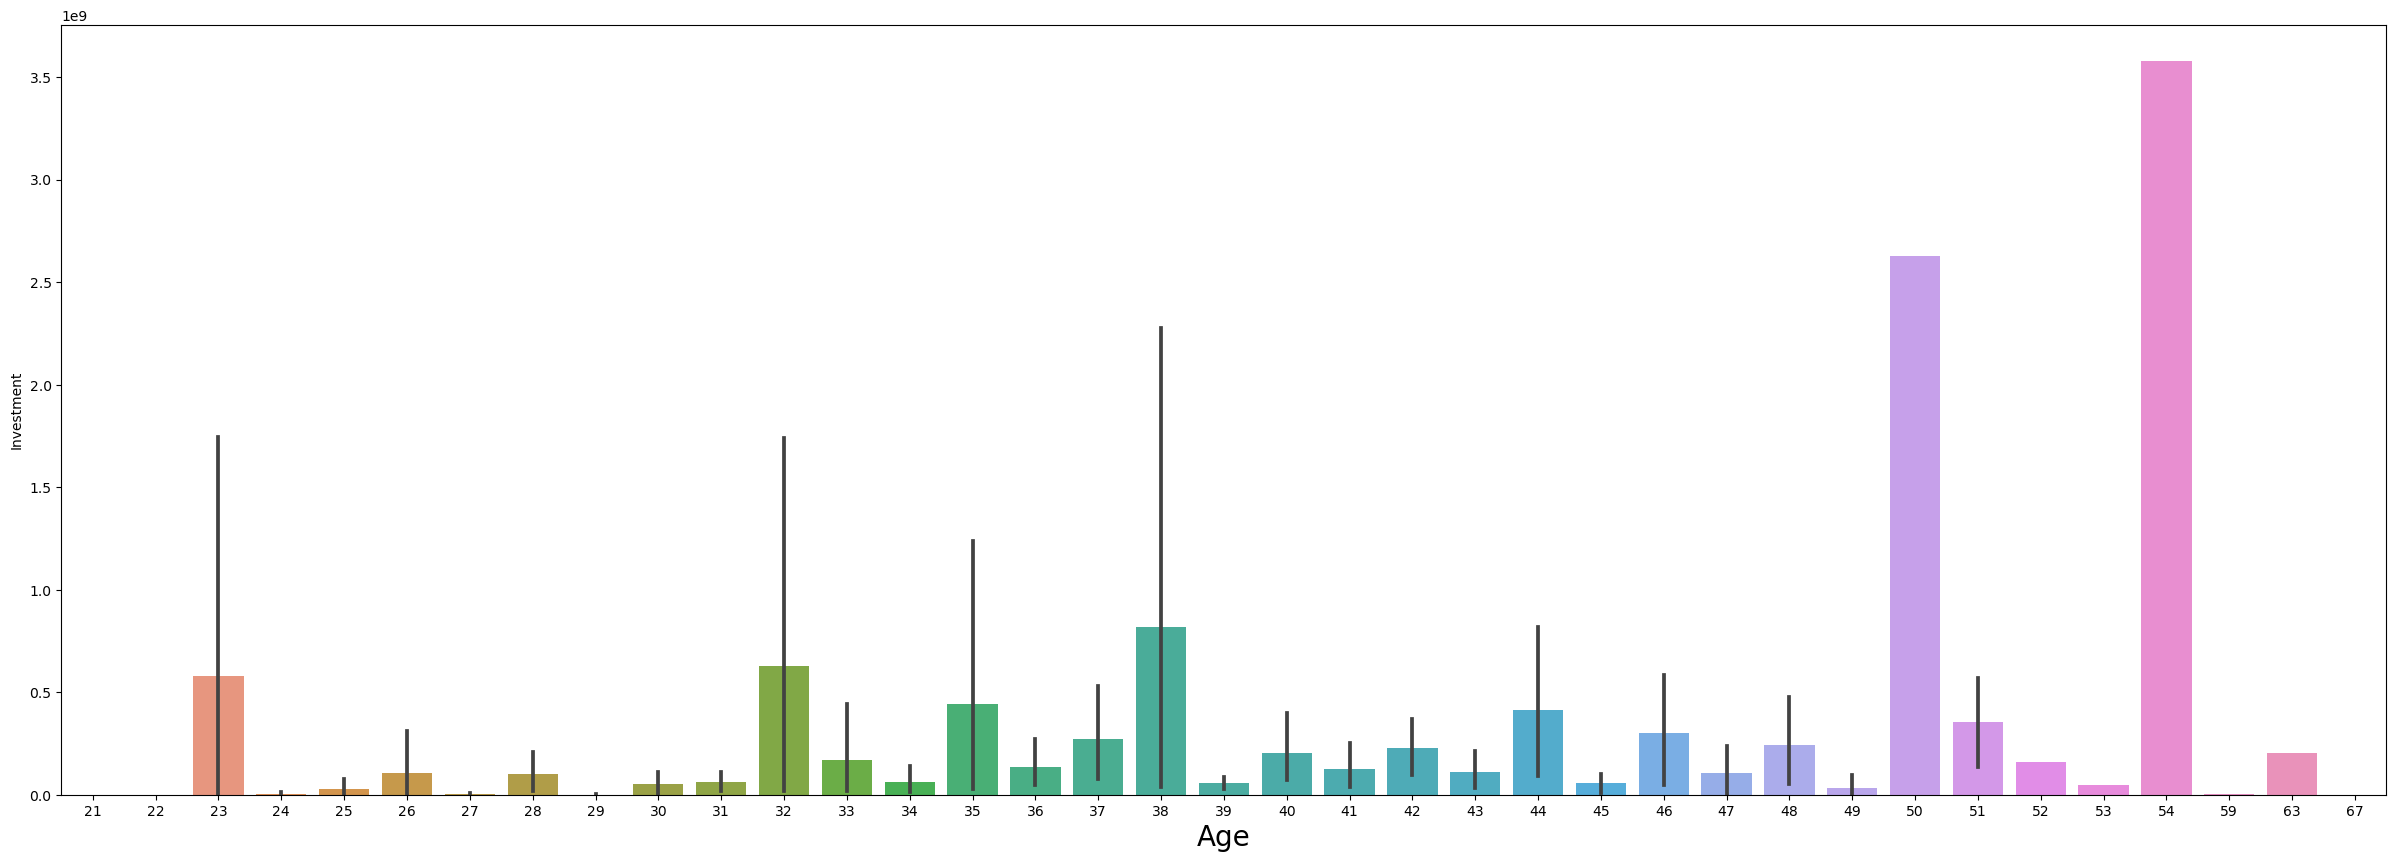

In [27]:
plt.subplots(figsize=(30, 10))
sns.barplot(x='Age',y='Investment', data=data)
plt.xlabel('Age', fontsize=20)
plt.ylabel('Investment')

Text(0, 0.5, 'Investment')

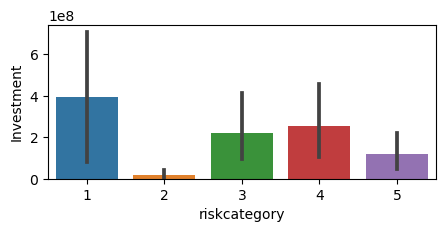

In [28]:
plt.subplots(figsize=(5, 2))
sns.barplot(x='riskcategory',y='Investment', data=data)
plt.xlabel('riskcategory', fontsize=10)
plt.ylabel('Investment', fontsize=10)

#### Insight

People have high investments tends to take higher risks

Text(0, 0.5, 'savings')

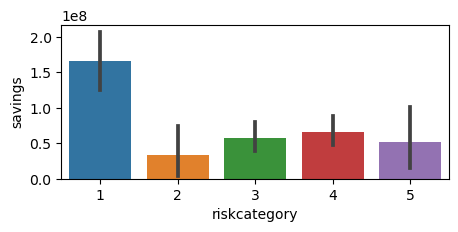

In [29]:
plt.subplots(figsize=(5, 2))
sns.barplot(x='riskcategory',y='Savings', data=data)
plt.xlabel('riskcategory')
plt.ylabel('savings')

#### Insight

High risk taking categories have higher savings

In [30]:
data.riskcategory.value_counts()

4    186
3    135
5     30
2     17
1      2
Name: riskcategory, dtype: int64

Text(0, 0.5, 'Savings')

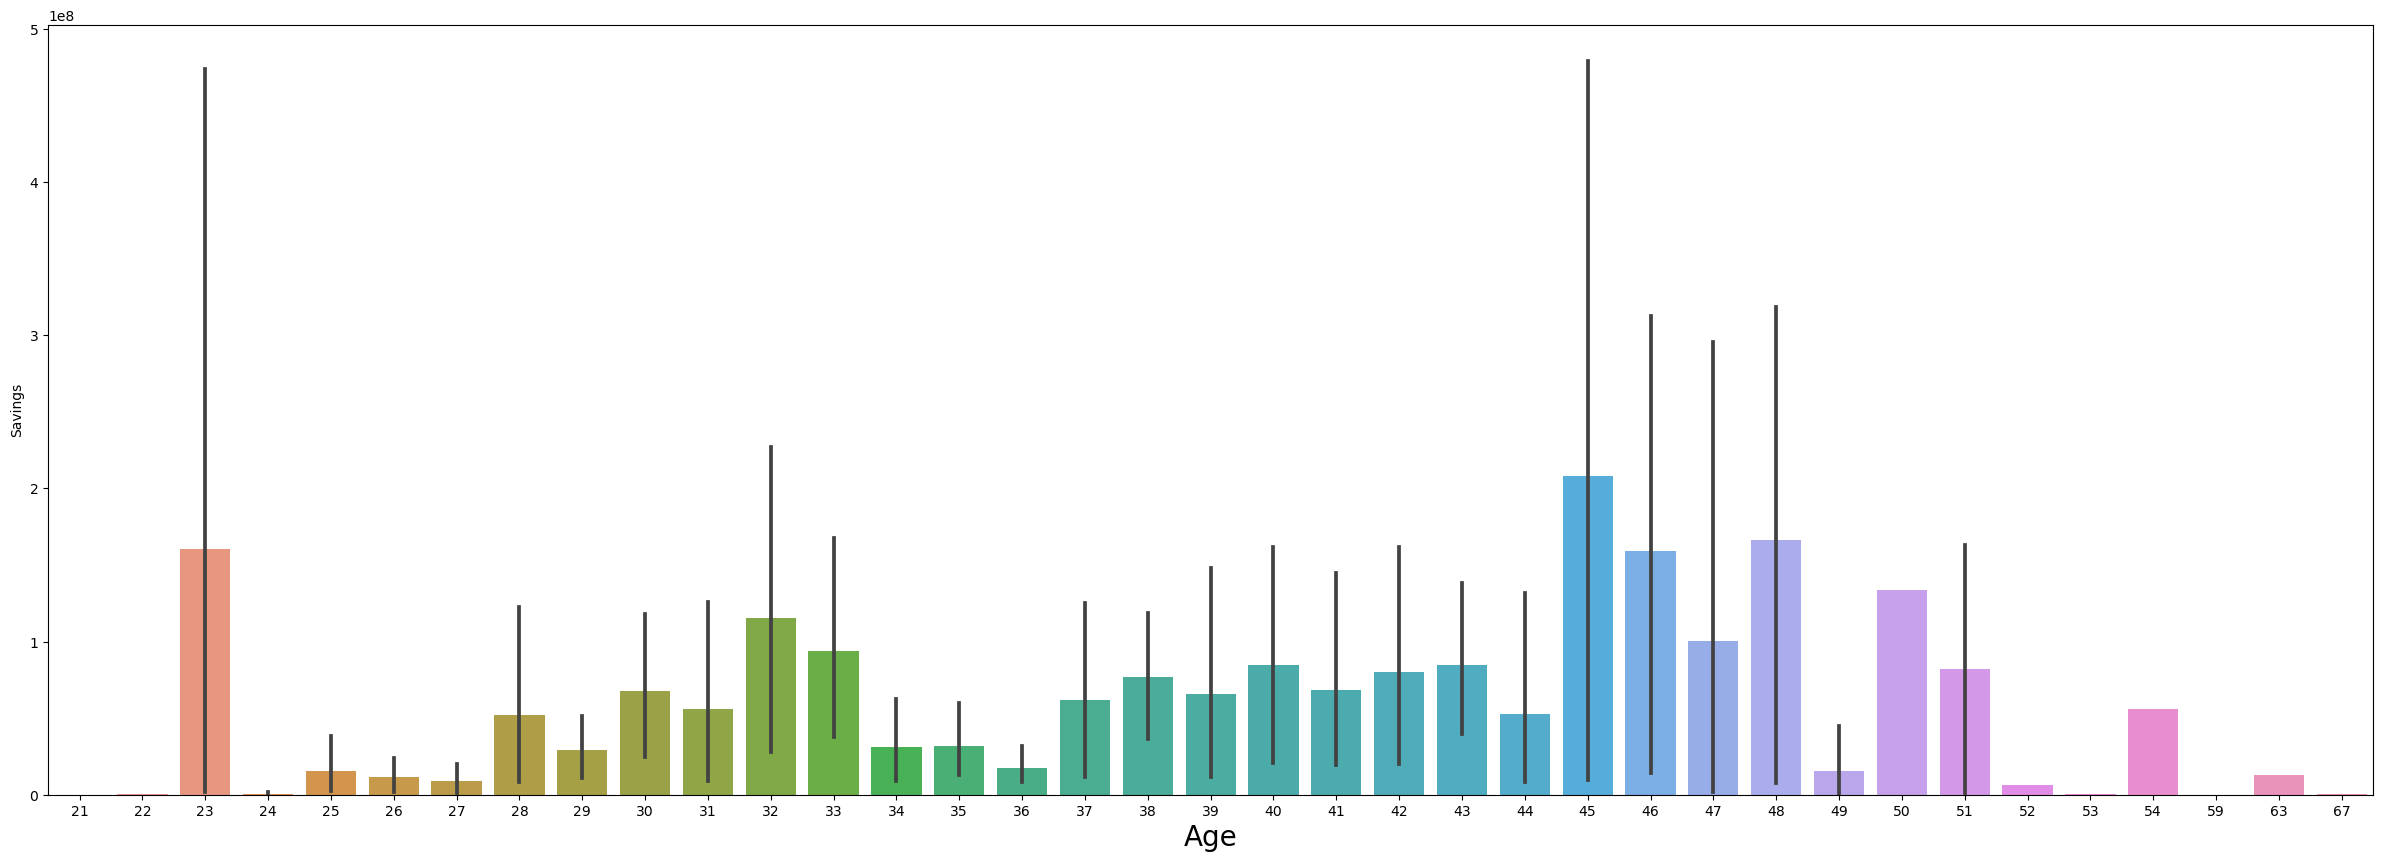

In [32]:
plt.subplots(figsize=(30, 10))
sns.barplot(x='Age',y='Savings', data=data)
plt.xlabel('Age', fontsize=20)
plt.ylabel('Savings')

### Outlier detection and treatment

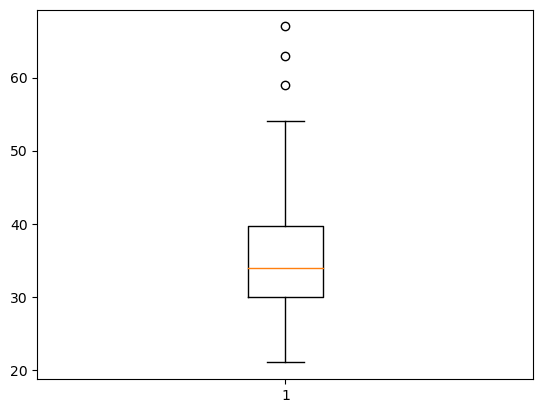

In [33]:
plt.boxplot(data['Age'])
plt.show()

#### Insight

There are no outliers in age column

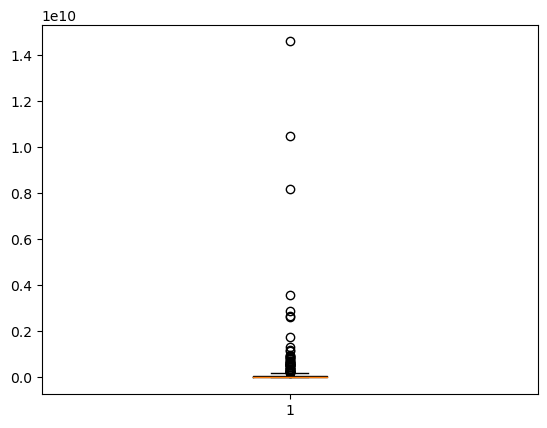

In [34]:
plt.boxplot(data['Investment'])
plt.show()

In [36]:
data.drop(data[data['Investment'] > 8214400000].index, inplace=True)

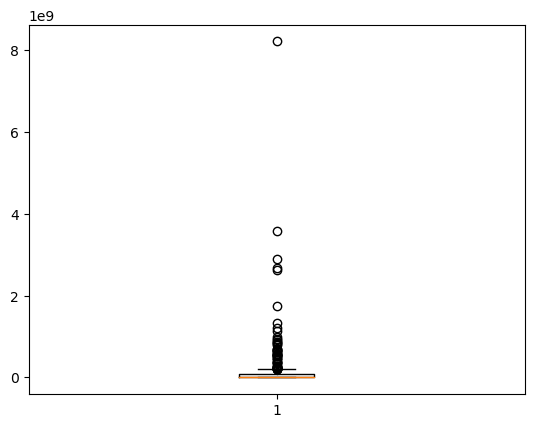

In [38]:
plt.boxplot(data['Investment'])
plt.show()

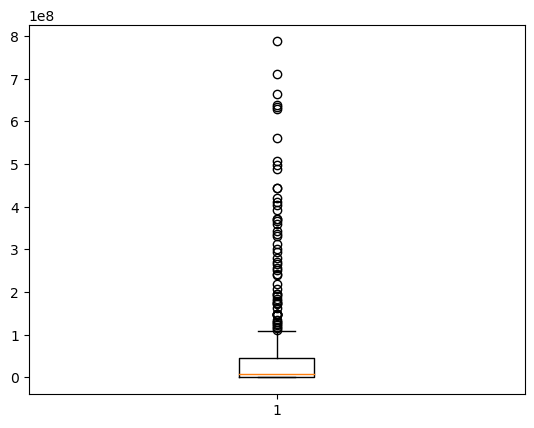

In [39]:
plt.boxplot(data['Savings'])
plt.show()

In [30]:
#data.drop(data[data['savings'] >= 146003694844].index, inplace=True)


In [40]:
# plt.boxplot(data['savings'])
# plt.show()

In [41]:
#data.drop(data[data['expenses'] < 7].index, inplace = True)

#### In expenses column we have one outlier before minimum in box plot, removing the outlier

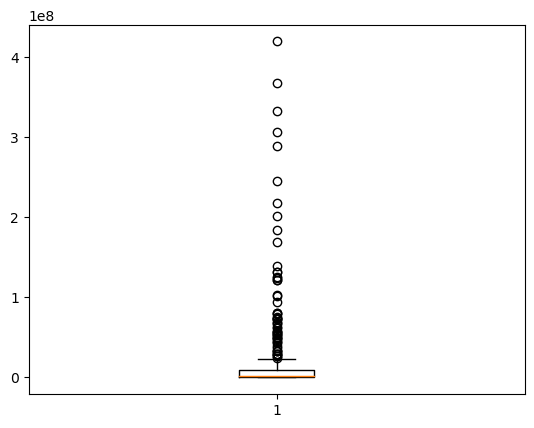

In [42]:
plt.boxplot(data['Expenses'])
plt.show()

In [34]:
#data.drop(data[data['expenses'] >= 15582336000].index, inplace=True)


In [43]:
# plt.boxplot(data['expenses'])
# plt.show()

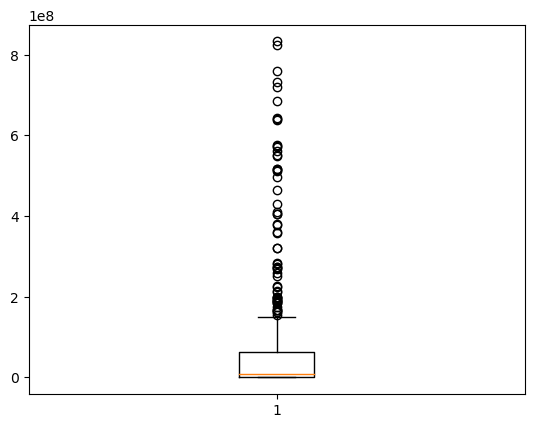

In [44]:
plt.boxplot(data['Income'])
plt.show()

In [46]:
#data.drop(data[data['income'] > 658707518219].index, inplace=True)

In [48]:
data.to_csv('/home/khusboos/Downloads/risk_appetite_data.csv' , index=None)

In [49]:
data.to_csv('risk_appetite_data.csv', index=0)